In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 


In [2]:
data = pd.read_csv('Salary_Data.csv')


In [3]:
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


# Data Preparation



In [5]:
# Sélectionnons les colonnes "YearsExperience" comme variables d'entrée
# et la colonne "Salary" comme variable cible
X = data[['YearsExperience']]
y = data['Salary']

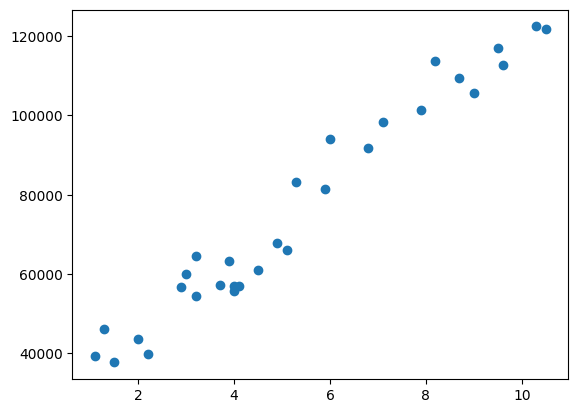

In [6]:
plt.scatter(X, y)

# Entrainement du modèle
## Nous allons séparer le dataset en deux pour entrainer et tester

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=1/3,random_state=0)

In [8]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [9]:
regressor.fit(X_train,y_train)

LinearRegression()

In [10]:
# Retrouver les coefficients et l'ordonnée à l'origine
print(regressor.coef_)
print(regressor.intercept_) #ordonnée à l'origine

[9345.94244312]
26816.192244031183


Text(0, 0.5, 'Salary')

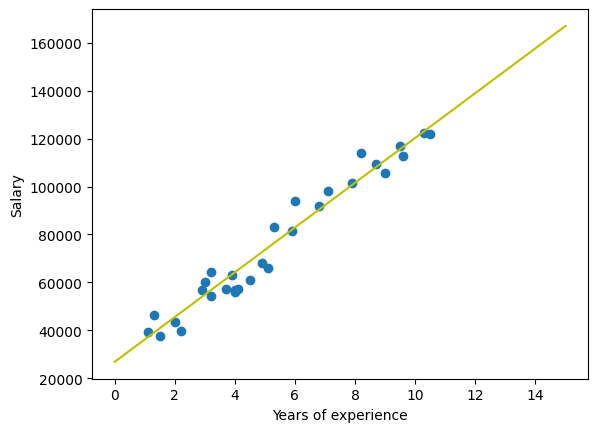

In [14]:
#Ajoutons la droite au graphique
ordonne = np.linspace(0,15,1000)
plt.scatter(X,y)
plt.plot(ordonne,regressor.coef_[0]*ordonne+regressor.intercept_,color='y')
plt.xlabel('Years of experience')
plt.ylabel('Salary')

# Evaluation du modèle
C'est le moment du test

In [12]:
y_predict = regressor.predict(X_test)

In [13]:
from sklearn import metrics
print ('MAE:  ', metrics.mean_absolute_error(y_test, y_predict))
print('MSE:', metrics.mean_squared_error(y_test, y_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))
print('R²:', metrics.r2_score(y_test, y_predict))

MAE:   3426.4269374307078
MSE: 21026037.329511296
RMSE: 4585.4157204675885
R²: 0.9749154407708353


# Testons de nouvelles données

In [16]:
NewData = [[5],[4]]
NewTest = pd.DataFrame(NewData,columns=['YearsExperience'])
y_new = regressor.predict(NewTest)
y_new

array([67781.22202281, 62478.36884153])